# Data Wrangling - We Rate Dogs Insights

## The aim of this project is to wrangle data from multiple sources, clean these datasets, and combine these datasets where applicable.
## In the end, there are insights about the We Rate Dogs Twitter feed as well as a visualization.

# Gathering Data

### First, we load in the the easy datasets to acquire, which are the .csv file given to us and the .tsv file on a website.

In [129]:
import requests
import pandas as pd
import io
import numpy as np
import tweepy
import json
import matplotlib.pyplot as plt
%matplotlib inline

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

urlData = requests.get(url).content
df_images = pd.read_csv(io.StringIO(urlData.decode('utf-8')), sep='\t')
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

### Now, I move to the needed Twitter data by setting up my Twitter API access

API keys, secrets, and tokens are hidden, but the code will work if a user includes their own

consumer_key = '####'
consumer_secret = '####'
access_token = '####'
access_secret = '####'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

#### Now, I gather the JSON data for the tweet IDs in df_archive (ONLY RUN THE BELOW IF YOU USED YOUR TWITTER API KEYS ABOVE)

In [90]:
import sys

tweet_id = df_archive['tweet_id']
tweets = []

for x in tweet_id:

    try:
        tweet = api.get_status(x, tweet_mode='extended')
        tweets.append(tweet)
    except: # catch *all* exceptions
        e = sys.exc_info()[0]
        print( "<p>Error: %s</p>" % e )

<p>Error: <class 'NameError'></p>
<p>Error: <class 'NameError'></p>
<p>Error: <class 'NameError'></p>
<p>Error: <class 'NameError'></p>
<p>Error: <class 'NameError'></p>
<p>Error: <class 'NameError'></p>
<p>Error: <class 'NameError'></p>
<p>Error: <class 'NameError'></p>
<p>Error: <class 'NameError'></p>
<p>Error: <class 'NameError'></p>
<p>Error: <class 'NameError'></p>
<p>Error: <class 'NameError'></p>
<p>Error: <class 'NameError'></p>
<p>Error: <class 'NameError'></p>
<p>Error: <class 'NameError'></p>
<p>Error: <class 'NameError'></p>
<p>Error: <class 'NameError'></p>
<p>Error: <class 'NameError'></p>
<p>Error: <class 'NameError'></p>
<p>Error: <class 'NameError'></p>
<p>Error: <class 'NameError'></p>
<p>Error: <class 'NameError'></p>
<p>Error: <class 'NameError'></p>
<p>Error: <class 'NameError'></p>
<p>Error: <class 'NameError'></p>
<p>Error: <class 'NameError'></p>
<p>Error: <class 'NameError'></p>
<p>Error: <class 'NameError'></p>
<p>Error: <class 'NameError'></p>
<p>Error: <cla

### This gets the tweets into a json format that can be saved (ONLY RUN THE BELOW IF YOU USED YOUR TWITTER API KEYS ABOVE)

In [91]:
# status = status_list[0]
# json_str = json.dumps(status._json)

tweets_list_looped = []

for x in range(0, 2342):
    tweets_list_loop = tweets[x]
    json_str = json.dumps(tweets_list_loop._json)
    tweets_list_looped.append(json_str)

IndexError: list index out of range

In [92]:
len(tweets_list_looped)

0

### Here, I save the Twitter scrape file to my hard drive, and then open it again

### Don't run the code below unless you input your Twitter API Keys above.  If you run this without your Twitter API keys above, you'll erase the data I stored in "tweet_json.txt"

In [8]:
with open('tweet_json.txt', 'w') as outfile:  
    json.dump(tweets_list_looped, outfile)

### You can run the code below now (even without Twitter API Keys) because it's just opening my text file that resulted from the Twitter API data

In [130]:
from pprint import pprint

with open('tweet_json.txt') as f:
    data = json.load(f)

###  Now, I convert the Twitter scrape data into a pandas dataframe

In [131]:
scrape_ids = []
scrape_favs = []
scrape_retweets = []

for x in range(0, 2342):
    not_id, is_id = data[x].split('"id": ', 1)
    id_num, nothing = is_id.split(',', 1)
    not_fav, fav = data[x].split('"favorite_count": ', 1)
    fav_num, nothing = fav.split(',', 1)
    not_retweet, retweet = data[x].split('"retweet_count": ', 1)
    retweet_num, nothing = retweet.split(',', 1)
    scrape_ids.append(id_num)
    scrape_favs.append(fav_num)
    scrape_retweets.append(retweet_num)

In [132]:
df_scrapes = pd.DataFrame(
    {'id_num': scrape_ids,
     'fav_num': scrape_favs,
     'retweet_num': scrape_retweets
    })

# Assessing Data

#### Check the headers, data types, and null values in df_images

In [133]:
df_images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [134]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Check the headers, data types, and null values in df_archive

In [135]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [136]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### Check the headers, data types, and null values in df_scrapes

In [137]:
df_scrapes.head()

,fav_num,id_num,retweet_num
0,38226,892420643555336193,8374
1,32773,892177421306343426,6184
2,24681,891815181378084864,4092
3,41551,891689557279858688,8514
4,39740,891327558926688256,9220


In [138]:
df_scrapes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
fav_num        2342 non-null object
id_num         2342 non-null object
retweet_num    2342 non-null object
dtypes: object(3)
memory usage: 55.0+ KB


# Data Cleaning

## Define

### Quality

1.  There are retweeted statuses in our dataset
2.  There are many null values in the ID columns
3.  Expanded urls have non-Twitter urls sometimes
4.  Expanded urls have repeated Twitter urls
5.  Tweet_ID columns in df_archive and df_images should be strings because they are labels rather than being used numerically
6.  img_num in df_images should be strings because they are labels rather than being used numerically
7.  Convert timestamp from string to date so we could use it as a time-based feature
8.  Unexpected values in the denominators
9.  Convert number of favorites and number of retweets in df_scrapes to integers so we can numerically analyze them

### Tidiness

1.  The dog types should all be in one column
2.  The three datasets should be merged

## Code for Clean-up

### Make copies of all data sets to make sure we have back-up files

In [139]:
df_archive_copy = df_archive.copy()
df_images_copy = df_images.copy()
df_scrapes_copy = df_scrapes.copy()

## Quality

#### Define
1.  Remove retweet rows
#### Code

In [140]:
df_archive = df_archive[df_archive['retweeted_status_id'].isnull()]

#### Test

In [141]:
df_archive[df_archive['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define
2.  Remove ID columns with only null values
#### Code

In [142]:
df_archive = df_archive.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

#### Test

In [143]:
df_archive.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Define
3.  Remove non-Twitter expanded_urls - Part 1

Remove rows where no Twitter url is found at all
#### Code

In [144]:
df_archive = df_archive[(df_archive['expanded_urls'].str[0:19] == 'https://twitter.com') 
           | (df_archive['expanded_urls'].str.split(',').str[1].str[0:19] == 'https://twitter.com')]

#### Test

In [145]:
df_archive[(df_archive['expanded_urls'].str[0:19] != 'https://twitter.com') 
           & (df_archive['expanded_urls'].str.split(',').str[1].str[0:19] != 'https://twitter.com')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define
3.  Remove non-Twitter expanded_urls - Part 2

Remove non-Twitter part of rows with Twitter expanded_urls
#### Code

In [146]:
df_archive['expanded_urls'] = df_archive['expanded_urls'].str.partition('https://twitter.com')[1] + df_archive['expanded_urls'].str.partition('https://twitter.com')[2]

#### Test

In [147]:
(df_archive['expanded_urls'].str.find('https://twitter.com') != 0).sum()

0

#### Define
4.  Only keep one twitter.com instance per row
#### Code

In [148]:
df_archive['expanded_urls'] = df_archive['expanded_urls'].str.split(',').str[0]

#### Test

In [149]:
df_archive['expanded_urls'].str.split(',').str[1].notnull().sum()

0

#### Define
5.  Convert tweet_id columns in df_archive and df_images to strings because they are labels rather than being used numerically
#### Code

In [150]:
df_archive['tweet_id'] = df_archive['tweet_id'].astype(str)

In [151]:
df_images['tweet_id'] = df_images['tweet_id'].astype(str)

#### Test

In [152]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2023 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2023 non-null object
timestamp             2023 non-null object
source                2023 non-null object
text                  2023 non-null object
expanded_urls         2023 non-null object
rating_numerator      2023 non-null int64
rating_denominator    2023 non-null int64
name                  2023 non-null object
doggo                 2023 non-null object
floofer               2023 non-null object
pupper                2023 non-null object
puppo                 2023 non-null object
dtypes: int64(2), object(10)
memory usage: 205.5+ KB


In [153]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Define
6.  Convert img_num column in df_images to string because they are labels rather than being used numerically
#### Code

In [154]:
df_images['img_num'] = df_images['img_num'].astype(str)

#### Test

In [155]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), object(6)
memory usage: 152.1+ KB


#### Define
7.  Convert timestamp column in df_archive from string to date
#### Code

In [156]:
df_archive['timestamp'] = pd.to_datetime(df_archive['timestamp'])

#### Test

In [157]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2023 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2023 non-null object
timestamp             2023 non-null datetime64[ns]
source                2023 non-null object
text                  2023 non-null object
expanded_urls         2023 non-null object
rating_numerator      2023 non-null int64
rating_denominator    2023 non-null int64
name                  2023 non-null object
doggo                 2023 non-null object
floofer               2023 non-null object
pupper                2023 non-null object
puppo                 2023 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 205.5+ KB


#### Define
8.  Unexpected values in denominators - remove denominators unequal to ten because there are only 18 instances in our dataset, and they refer to groups of dogs or are dates
#### Code

In [158]:
df_archive = df_archive[df_archive['rating_denominator'] == 10]

#### Test

In [159]:
df_archive[df_archive['rating_denominator'] != 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define
9.  Convert number of favorites and number of retweets in df_scrapes to integers so we can numerically analyze them
#### Code

In [160]:
df_scrapes['fav_num'] = pd.to_numeric(df_scrapes['fav_num'], errors='coerce')
df_scrapes['retweet_num'] = pd.to_numeric(df_scrapes['retweet_num'], errors='coerce')

#### Test

In [161]:
df_scrapes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
fav_num        2342 non-null int64
id_num         2342 non-null object
retweet_num    2342 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.0+ KB


## Tidiness

#### Define
1.  The dog types should all be in one column
#### Code

In [172]:
df_archive.loc[df_archive['doggo'] == 'doggo', 'dog_type'] = 'doggo'
df_archive.loc[df_archive['floofer'] == 'floofer', 'dog_type'] = 'floofer'
df_archive.loc[df_archive['pupper'] == 'pupper', 'dog_type'] = 'pupper'
df_archive.loc[df_archive['puppo'] == 'puppo', 'dog_type'] = 'puppo'

#### Test

In [173]:
df_archive[['doggo', 'floofer', 'pupper', 'puppo','dog_type']][df_archive['dog_type'].notnull()]

,doggo,floofer,pupper,puppo,dog_type
9,doggo,None,None,None,doggo
12,None,None,None,puppo,puppo
14,None,None,None,puppo,puppo
29,None,None,pupper,None,pupper
43,doggo,None,None,None,doggo
46,None,floofer,None,None,floofer
49,None,None,pupper,None,pupper
56,None,None,pupper,None,pupper
71,None,None,None,puppo,puppo
82,None,None,pupper,None,pupper


### Code
#### Drop the now unnecessary columns

In [175]:
df_archive = df_archive.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

### Test

In [182]:
df_archive[df_archive['dog_type'].notnull()].head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo
12,889665388333682689,2017-07-25 01:55:32,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,None,puppo
14,889531135344209921,2017-07-24 17:02:04,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,puppo
29,886366144734445568,2017-07-15 23:25:31,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,pupper
43,884162670584377345,2017-07-09 21:29:42,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo


### Define

The three datasets should be merged

### Code

#### Merge df_archive and df_scrapes

In [183]:
df_archive = pd.merge(df_archive, df_scrapes, left_on = 'tweet_id', right_on = 'id_num')

#### Drop id_num because it's now redundant due to tweet_id

In [184]:
df_archive = df_archive.drop(['id_num'], axis=1)

#### Merge df_archive (which is now df_archive + df_scrapes) with df_images

In [185]:
df_archive = pd.merge(df_archive, df_images, left_on = 'tweet_id', right_on = 'tweet_id')

### Test

In [186]:
df_archive.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,fav_num,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,38226,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,32773,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,24681,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,41551,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,39740,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [187]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1975 entries, 0 to 1974
Data columns (total 22 columns):
tweet_id              1975 non-null object
timestamp             1975 non-null datetime64[ns]
source                1975 non-null object
text                  1975 non-null object
expanded_urls         1975 non-null object
rating_numerator      1975 non-null int64
rating_denominator    1975 non-null int64
name                  1975 non-null object
dog_type              306 non-null object
fav_num               1975 non-null int64
retweet_num           1975 non-null int64
jpg_url               1975 non-null object
img_num               1975 non-null object
p1                    1975 non-null object
p1_conf               1975 non-null float64
p1_dog                1975 non-null bool
p2                    1975 non-null object
p2_conf               1975 non-null float64
p2_dog                1975 non-null bool
p3                    1975 non-null object
p3_conf               1975 non-n

## Save this new master df_archive file to .csv as "twitter_archive_master.csv"

In [188]:
df_archive.to_csv('twitter-archive-master.csv')

### Insight 1:  Which type of dog has the most favorites on average?

In [189]:
df_archive['fav_num'][(df_archive['dog_type'] == 'doggo')].mean()

20176.746031746032

In [190]:
df_archive['fav_num'][(df_archive['dog_type'] == 'floofer')].mean()

13212.625

In [191]:
df_archive['fav_num'][(df_archive['dog_type'] == 'pupper')].mean()

7289.3349056603774

In [192]:
df_archive['fav_num'][(df_archive['dog_type'] == 'puppo')].mean()

22958.17391304348

#### Puppo tweets generally receive the most favorites

### Insight 2:  Which type of dog has the most retweets on average?

In [193]:
df_archive['retweet_num'][(df_archive['dog_type'] == 'doggo')].mean()

7110.9523809523807

In [194]:
df_archive['retweet_num'][(df_archive['dog_type'] == 'floofer')].mean()

4535.0

In [195]:
df_archive['retweet_num'][(df_archive['dog_type'] == 'pupper')].mean()

2337.4103773584907

In [196]:
df_archive['retweet_num'][(df_archive['dog_type'] == 'puppo')].mean()

6845.347826086957

#### Doggo tweets generally receive the most retweets

### Insight 3:  Which type of dog is posted the most on We Rate Dogs?

In [197]:
df_archive['fav_num'][(df_archive['dog_type'] == 'doggo')].count()

63

In [198]:
df_archive['fav_num'][(df_archive['dog_type'] == 'floofer')].count()

8

In [199]:
df_archive['fav_num'][(df_archive['dog_type'] == 'pupper')].count()

212

In [200]:
df_archive['fav_num'][(df_archive['dog_type'] == 'puppo')].count()

23

In [204]:
63 / (63+8+212+23)

0.20588235294117646

#### Puppers are tweeted the most often

### Visualization:  Which breed of dog is posted the most on We Rate Dogs?

In [201]:
df_vis = df_archive.groupby(['p1']).count().sort_values(ascending=False, by='fav_num')

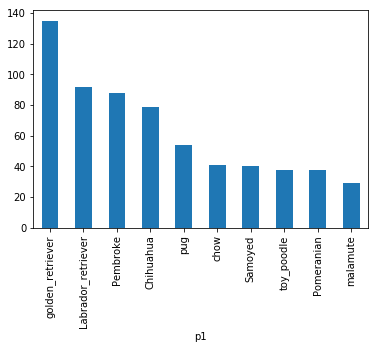

In [202]:
df_vis['tweet_id'].head(10).plot.bar();

#### Golden retrievers are the breed posted the most on We Rate Dogs